In [1]:
#importing libraries
import numpy as np
import pandas as pd

In [2]:
#loading data
df=pd.read_csv('Online Vehicle Booking/Car details v3.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
#Presence of missing values
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [6]:
#presence of duplicated rows
df.duplicated().sum()

1202

In [7]:
#removing duplicated rows
df.drop_duplicates(keep=False,inplace=True)
df.duplicated().sum()

0

In [8]:
#Separating string from features
df['name'] = df.name.apply(lambda x : ' '.join(x.split(' ')[:1]))
df['name']

0        Maruti
1         Skoda
2         Honda
3       Hyundai
4        Maruti
         ...   
8121     Maruti
8122    Hyundai
8123    Hyundai
8124    Hyundai
8125     Maruti
Name: name, Length: 6301, dtype: object

In [9]:
df['mileage']=df.mileage.str.replace('[^\d.]','').astype(float)

C:\Users\malav\AppData\Local\Temp\ipykernel_3808\3718693671.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['mileage']=df.mileage.str.replace('[^\d.]','').astype(float)


In [10]:
df['engine']=df.engine.str.replace('[^\d.]','').astype(float)

C:\Users\malav\AppData\Local\Temp\ipykernel_3808\473780778.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['engine']=df.engine.str.replace('[^\d.]','').astype(float)


In [11]:
#filling missing values
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')
df['mileage']=imp.fit_transform(df['mileage'].values.reshape(-1,1))

In [12]:
imp=SimpleImputer(strategy='mean')
df['engine']=imp.fit_transform(df['engine'].values.reshape(-1,1))

In [13]:
imp=SimpleImputer(strategy='median')
df['seats']=imp.fit_transform(df['seats'].values.reshape(-1,1))
df['seats']=df['seats'].astype(int)

In [14]:
#data visualisations
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df['name'].value_counts()

Maruti           1993
Hyundai          1149
Mahindra          676
Tata              594
Ford              327
Honda             323
Toyota            315
Chevrolet         202
Renault           185
Volkswagen        162
Nissan             65
Skoda              63
Datsun             50
Fiat               41
Mercedes-Benz      39
BMW                31
Audi               30
Jeep               17
Mitsubishi          8
Volvo               6
Ambassador          4
MG                  3
Daewoo              3
Jaguar              3
Isuzu               3
Kia                 2
Land                2
Force               2
Ashok               1
Opel                1
Peugeot             1
Name: name, dtype: int64

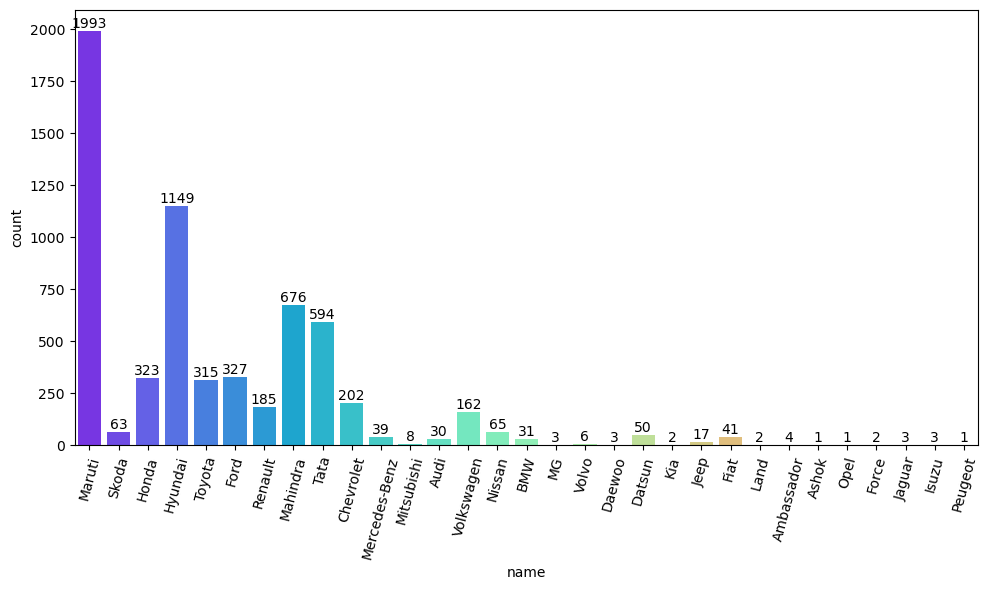

In [16]:
plt.rcParams['figure.figsize']=(10,6)
fig1=sns.countplot(data=df,x='name',palette='rainbow')
fig1.bar_label(fig1.containers[0])
plt.xticks(rotation=75)
plt.tight_layout()

In [17]:
df['fuel'].value_counts()

Diesel    3411
Petrol    2797
CNG         55
LPG         38
Name: fuel, dtype: int64

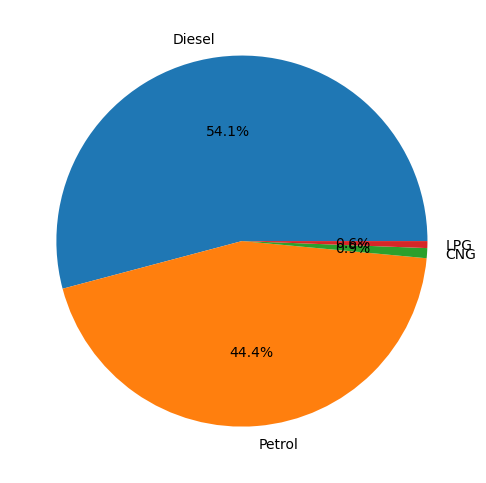

In [18]:
plt.rcParams['figure.figsize']=(5,5)
labels=['Diesel','Petrol','CNG','LPG']
size=df['fuel'].value_counts()
fig1=plt.pie(size,labels=labels,autopct='%1.1f%%')
plt.tight_layout()

In [19]:
df['seller_type'].value_counts()

Individual          5745
Dealer               539
Trustmark Dealer      17
Name: seller_type, dtype: int64

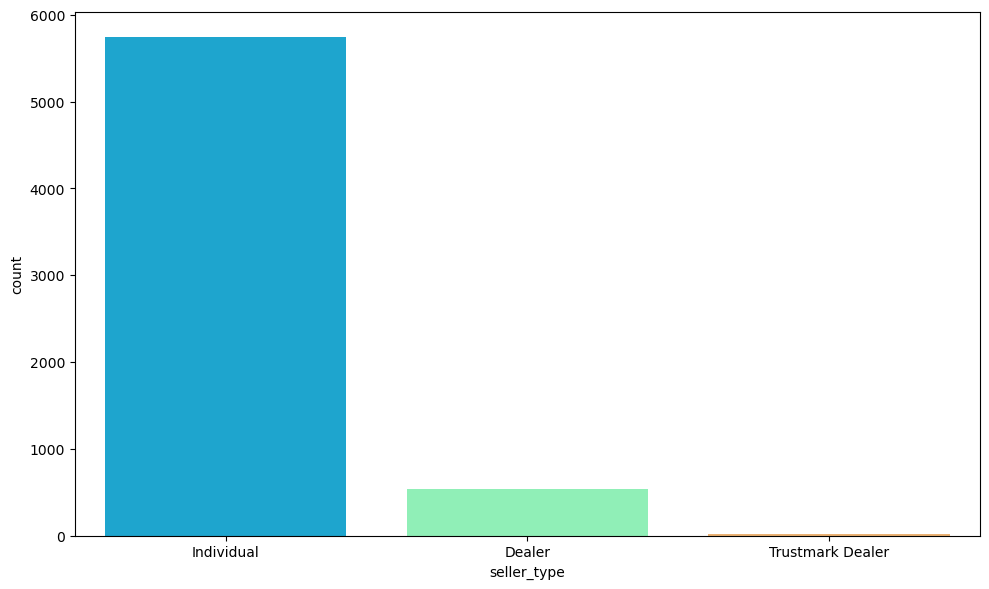

In [20]:
plt.rcParams['figure.figsize']=(10,6)
fig2=sns.countplot(data=df,x='seller_type',palette='rainbow')
plt.tight_layout()

In [21]:
df['transmission'].value_counts()

Manual       5827
Automatic     474
Name: transmission, dtype: int64

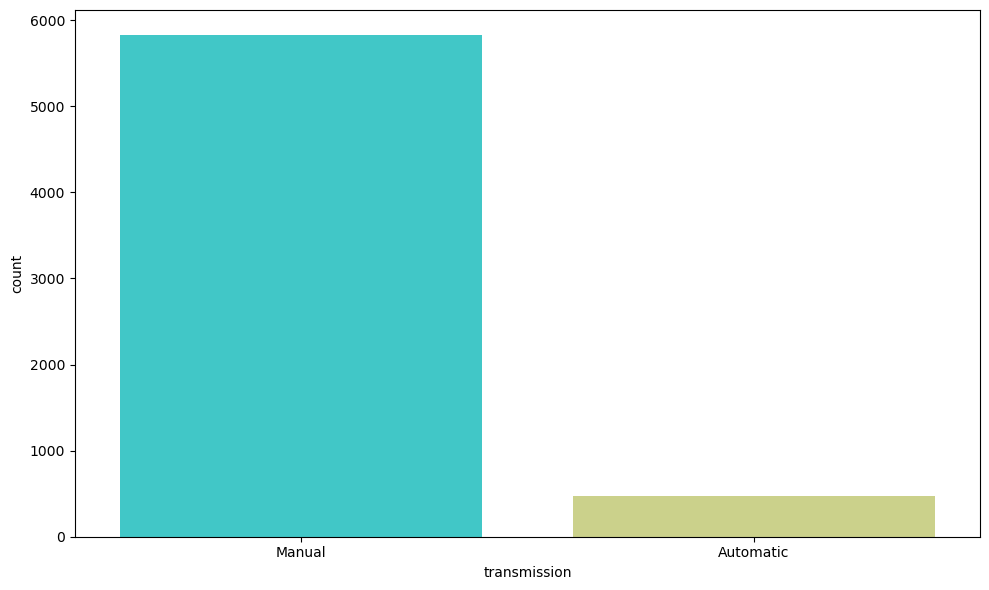

In [22]:
plt.rcParams['figure.figsize']=(10,6)
fig3=sns.countplot(data=df,x='transmission',palette='rainbow')
plt.tight_layout()

In [23]:
df['owner'].value_counts()

First Owner             3740
Second Owner            1875
Third Owner              517
Fourth & Above Owner     164
Test Drive Car             5
Name: owner, dtype: int64

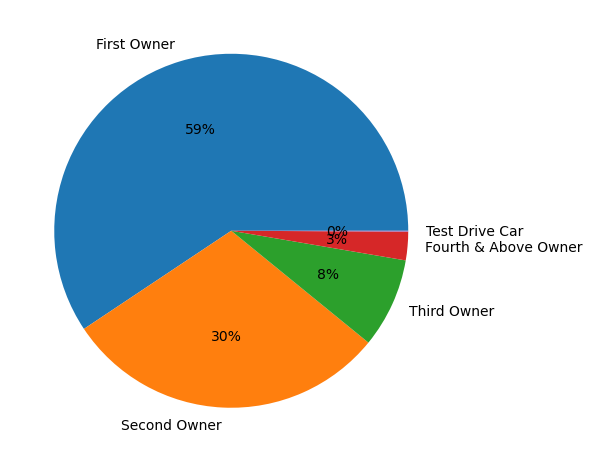

In [24]:
plt.rcParams['figure.figsize']=(6,6)
labels=['First Owner','Second Owner','Third Owner','Fourth & Above Owner','Test Drive Car']
size=df['owner'].value_counts()
fig2=plt.pie(size,labels=labels,autopct='%1.f%%')
plt.tight_layout()

In [25]:
df['seats'].value_counts()

5     4961
7      877
8      208
4      115
9       68
6       52
10      17
2        2
14       1
Name: seats, dtype: int64

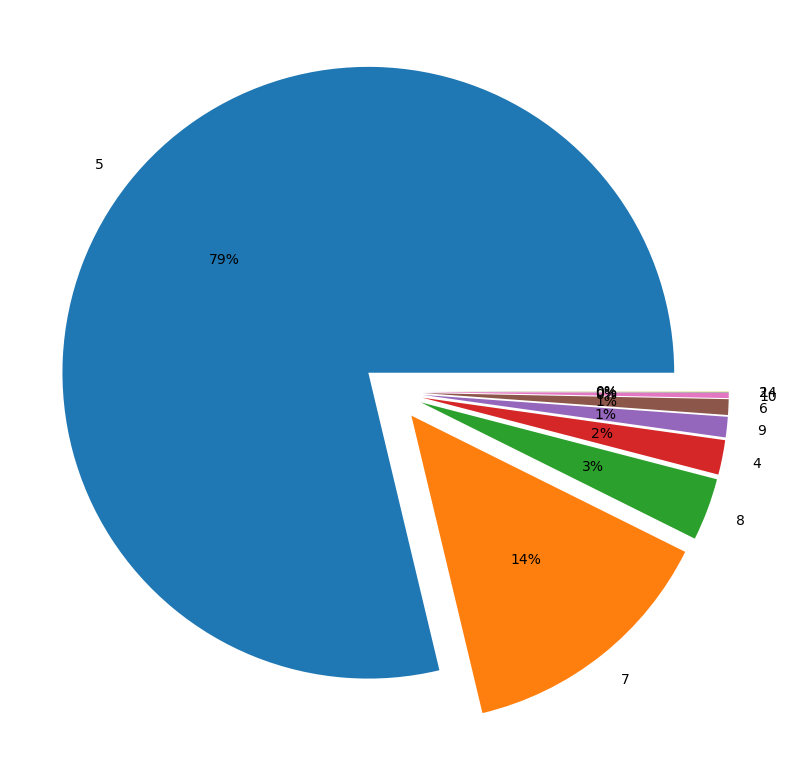

In [26]:
plt.rcParams['figure.figsize']=(8,12)
labels=['5','7','8','4','9','6','10','2','14']
size=df['seats'].value_counts()
fig3=plt.pie(size,labels=labels,autopct='%1.f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.tight_layout()

In [27]:
df['year'].value_counts()

2017    718
2015    617
2016    617
2012    558
2014    545
2011    520
2013    512
2018    498
2010    366
2019    289
2009    234
2008    196
2007    169
2006    122
2005     85
2004     58
2020     54
2003     45
2002     25
2000     18
1999     16
1997     11
1998     10
2001      8
1996      3
1994      3
1995      2
1983      1
1991      1
Name: year, dtype: int64

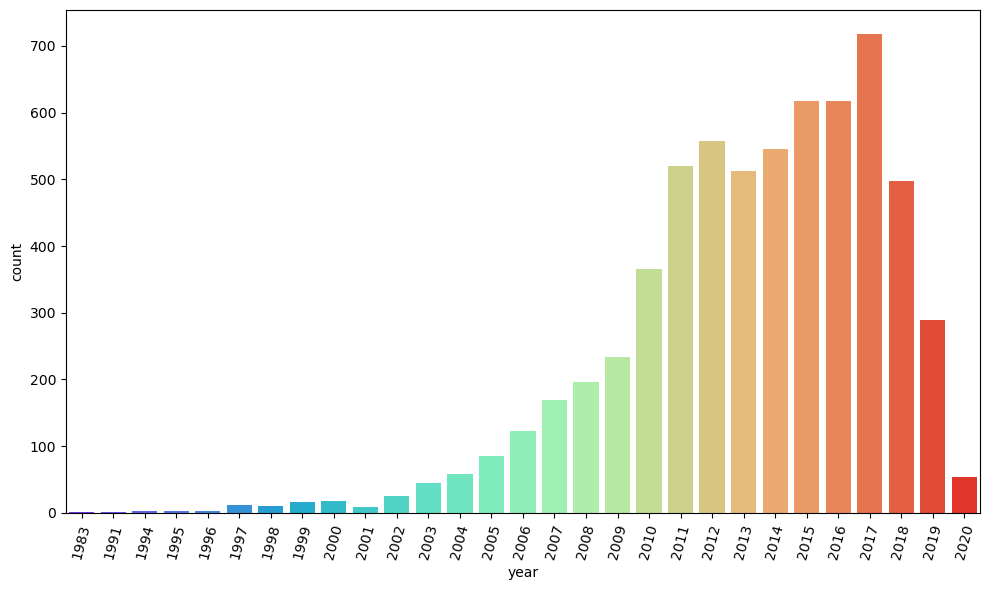

In [28]:
plt.rcParams['figure.figsize']=(10,6)
fig3=sns.countplot(data=df,x='year',palette='rainbow')
plt.xticks(rotation=75)
plt.tight_layout()

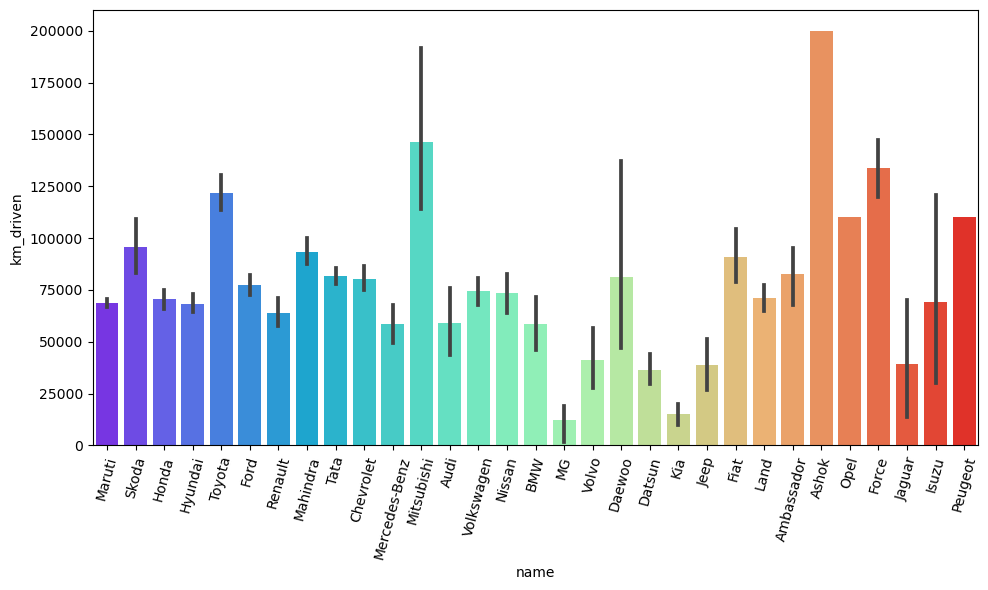

In [29]:
plt.rcParams['figure.figsize']=(10,6)
fig4=sns.barplot(x='name',y='km_driven',data=df,palette='rainbow')
plt.xticks(rotation=75)
plt.tight_layout()

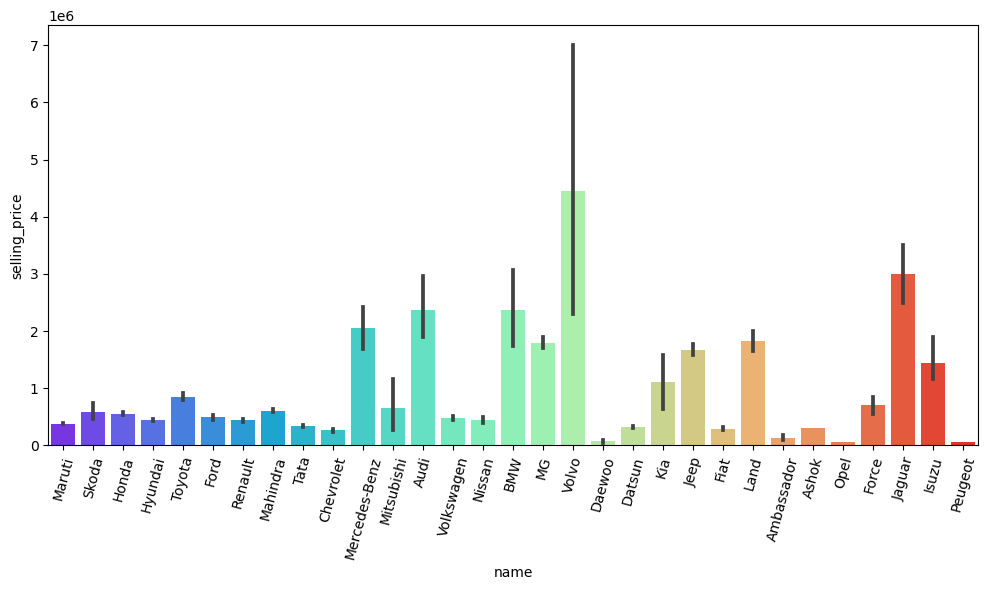

In [30]:
plt.rcParams['figure.figsize']=(10,6)
fig4=sns.barplot(x='name',y='selling_price',data=df,palette='rainbow')
plt.xticks(rotation=75)
plt.tight_layout()

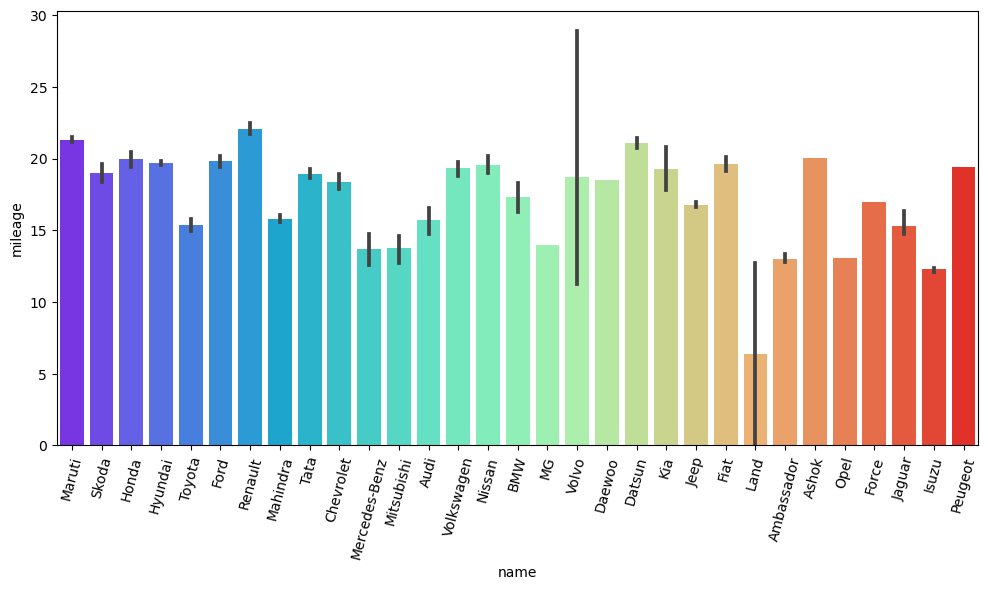

In [31]:
plt.rcParams['figure.figsize']=(10,6)
fig4=sns.barplot(x='name',y='mileage',data=df,palette='rainbow')
plt.xticks(rotation=75)
plt.tight_layout()

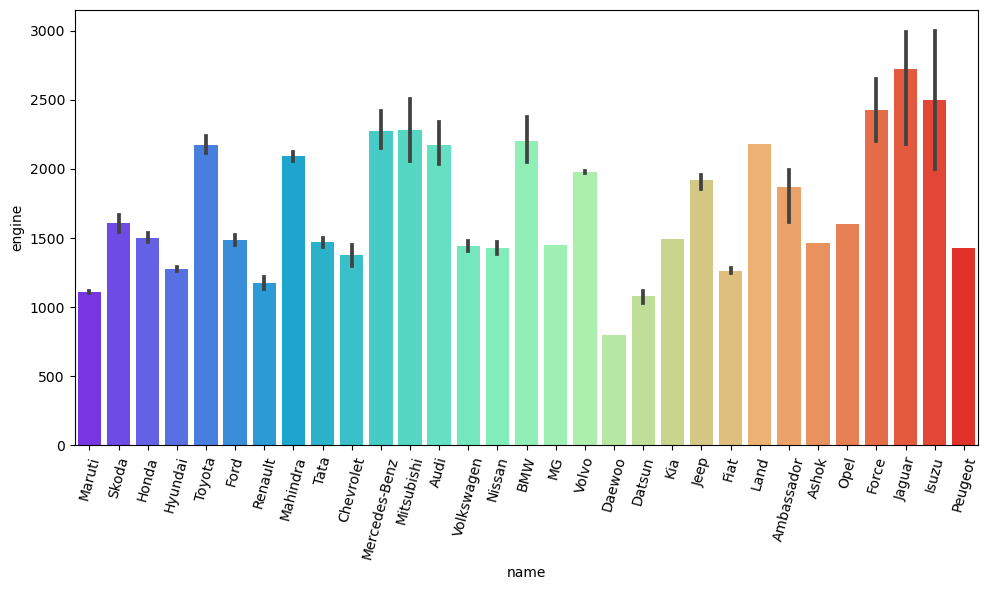

In [32]:
plt.rcParams['figure.figsize']=(10,6)
fig4=sns.barplot(x='name',y='engine',data=df,palette='rainbow')
plt.xticks(rotation=75)
plt.tight_layout()

<AxesSubplot:>

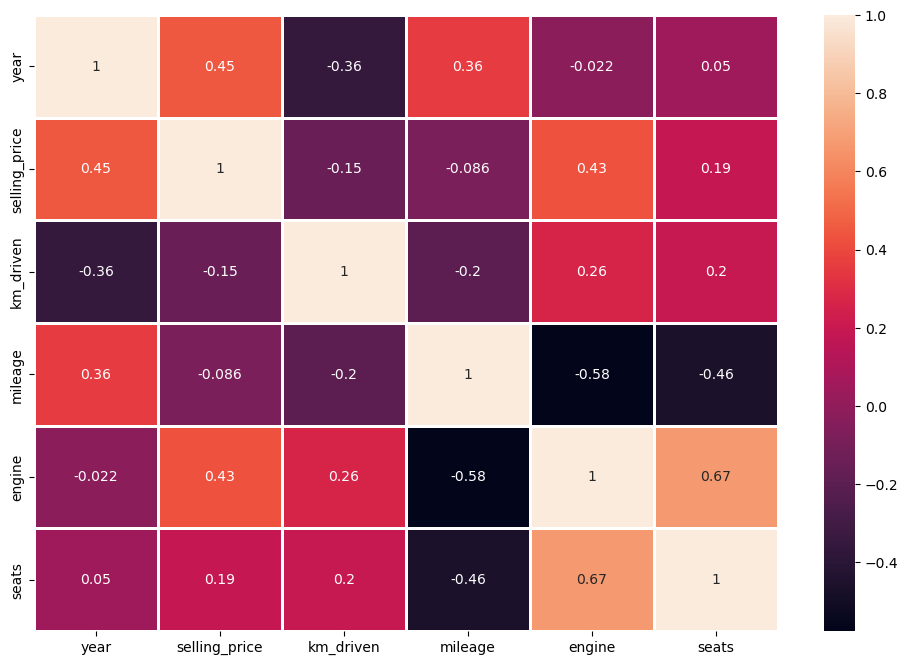

In [33]:
#Correlation matrix plot of data
ax= plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)

In [34]:
#Data Pre-Processing
#label encoding
df1=df.drop(labels=['max_power','torque'],axis=1)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_enc=df1.apply(le.fit_transform)
df_enc.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,19,22,276,702,1,1,1,0,316,24,2
1,26,22,223,654,1,1,1,2,268,48,2
2,10,14,92,691,3,1,1,4,169,47,2
3,11,18,134,670,1,1,1,0,308,35,2
4,19,15,72,654,3,1,1,0,128,25,2


In [35]:
#scaling features
from sklearn.preprocessing import StandardScaler
columns = ['name','year','selling_price','km_driven','fuel','seller_type','transmission',
            'owner','mileage','engine','seats']
d= df_enc.loc[:, columns].values
d= StandardScaler().fit_transform(d)

In [36]:
#principal component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
d_pca= pca.fit_transform(d)
df2=pd.DataFrame(d_pca, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6', 'PC7','PC8','PC9','PC10','PC11'])
df2.head()     

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-0.254266,-0.079956,-1.674460,0.701192,-0.009316,0.234956,-1.088099,-0.445388,-0.369964,0.130937,0.127736
1,0.456738,0.777923,-1.546565,0.429354,0.779444,0.833064,0.255016,-0.078518,-0.484547,-0.281383,-0.386632
2,-0.285826,3.236188,1.151800,0.851238,-0.784608,0.201119,0.879044,-0.130978,-0.524917,0.469310,-0.563570
3,-0.444123,0.837858,-0.987165,1.149319,-0.799977,-0.238038,-1.492618,0.043581,0.339165,0.046825,-0.337672
4,-0.621755,1.998678,0.685805,-0.646277,0.460433,-0.605334,-1.501685,-0.109378,-0.455895,0.150786,0.083074


In [37]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df2.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
PC1,0.124225,0.046813,-0.325150,-0.391310,0.817660,0.217333,0.051028,0.004767,-0.060751,0.034881,-0.013961
PC2,-0.021664,-0.547889,-0.174063,-0.106923,-0.111024,0.060389,0.249146,-0.370534,-0.265481,-0.600918,-0.103408
PC3,0.278001,-0.495604,-0.025824,0.050967,-0.094164,0.134872,0.155962,0.086882,-0.385740,0.595155,0.334504
PC4,0.246876,0.400479,-0.224735,0.312257,-0.017855,0.026411,-0.354552,-0.530257,-0.470758,0.025559,0.022271
PC5,-0.368383,0.060529,0.503697,-0.389689,0.051571,-0.119956,0.092243,-0.349453,-0.323552,0.312401,-0.324201
PC6,-0.036854,0.200113,-0.240439,-0.553971,-0.506595,0.552233,-0.157700,0.078335,-0.019141,0.030030,0.005371
PC7,-0.117596,0.203671,-0.511734,-0.218602,-0.169874,-0.645853,0.268478,0.214410,-0.258488,0.062852,0.015108
PC8,0.046145,0.406104,0.058911,0.237984,-0.032385,0.329908,0.811593,-0.056924,-0.027984,-0.010297,0.011920
PC9,-0.378153,-0.201773,-0.479039,0.301936,-0.020305,0.148167,0.015236,-0.192272,0.272251,0.385376,-0.461998


<AxesSubplot:ylabel='variable'>

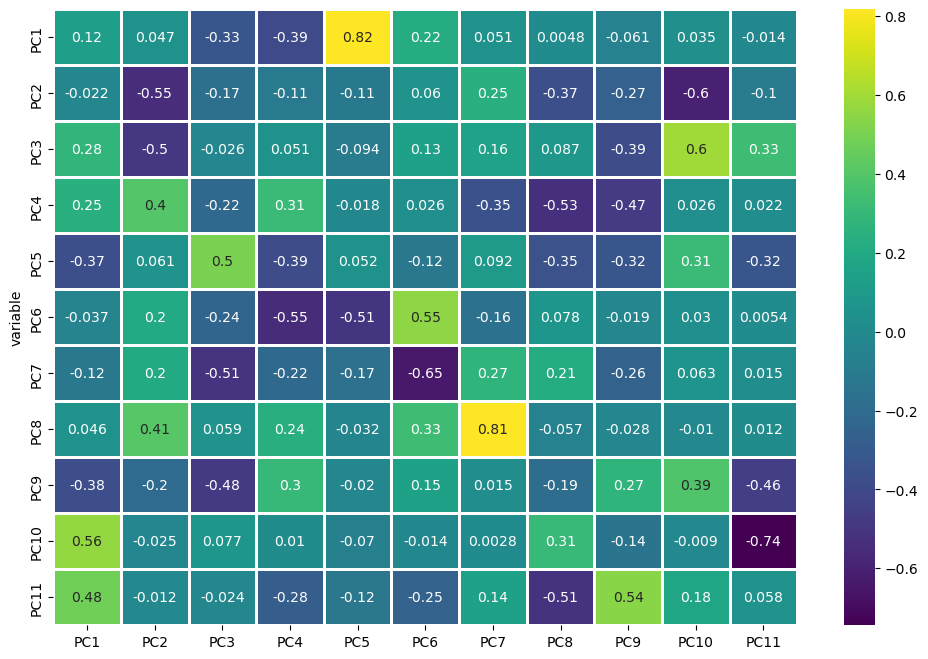

In [38]:
#Correlation matrix plot of loadings 
plt.rcParams['figure.figsize'] = (12,8)
sns.heatmap(loadings_df,linewidths=1,linecolor='white',annot=True, cmap='viridis')

In [39]:
# finding number of clusters
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 12):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(d_pca)
  wcss.append(kmean.inertia_)

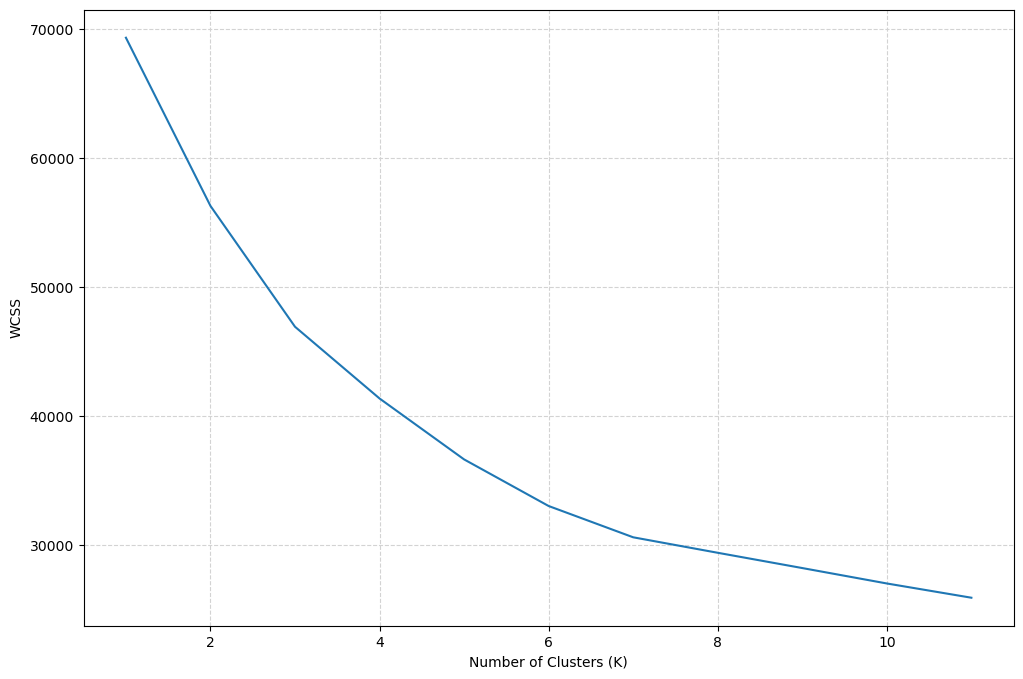

In [40]:
plt.figure(figsize=(12,8))
plt.plot(range(1, 12), wcss)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--',zorder=1)
plt.show()

In [41]:
# K-means clustering is done by taking k=6
kmean = KMeans(n_clusters=6, init='k-means++', random_state=0)
kmean.fit(d_pca)
df['cluster_num'] = kmean.labels_ #adding to df
print (kmean.labels_) #Label assigned for each data point
print (kmean.inertia_) #gives within-cluster sum of squares. 
print(kmean.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmean.cluster_centers_) #Location of the centroids on each cluster.

[1 1 0 ... 3 0 1]
33027.08094097982
27
[[-6.16858519e-01  2.03519607e+00  4.09089811e-01  1.31129036e-01
   4.60618259e-02  9.15799390e-02  6.98578952e-02  9.75629590e-02
  -6.87583231e-02  3.04190015e-02  7.04640510e-02]
 [-1.28907407e-01 -4.46959793e-01 -1.22703212e+00  4.34067676e-01
  -2.40654844e-01  2.94527566e-01 -1.67876399e-01  1.46611059e-01
   4.23567787e-02  1.91710589e-02  5.15775732e-02]
 [-2.36882898e-01 -1.41606416e+00  4.86971822e-01  1.72168874e+00
   1.36460250e+00 -1.99222537e+00  4.69923104e-01 -5.10194600e-02
  -6.17470483e-03 -6.17247271e-04 -2.16379076e-02]
 [-1.40282723e+00 -6.49248179e-01  2.89855376e-01 -9.14498823e-01
  -1.85611668e-01 -2.04467142e-01  1.07349638e-01 -1.23626245e-01
  -1.36998432e-01 -3.10291355e-02 -7.10267642e-02]
 [ 3.16627525e+00  3.11794094e-01 -1.55387476e-01 -7.25274929e-01
  -1.89714527e-01 -4.79236711e-01  1.36069163e-01 -9.43833547e-02
   1.19100659e-01 -1.29136244e-02 -8.95262819e-02]
 [ 1.13780834e+00 -1.97983795e+00  2.36316492e

In [42]:
pd.Series(kmean.labels_).value_counts()     

1    1727
3    1455
0    1421
4     859
5     451
2     388
dtype: int64

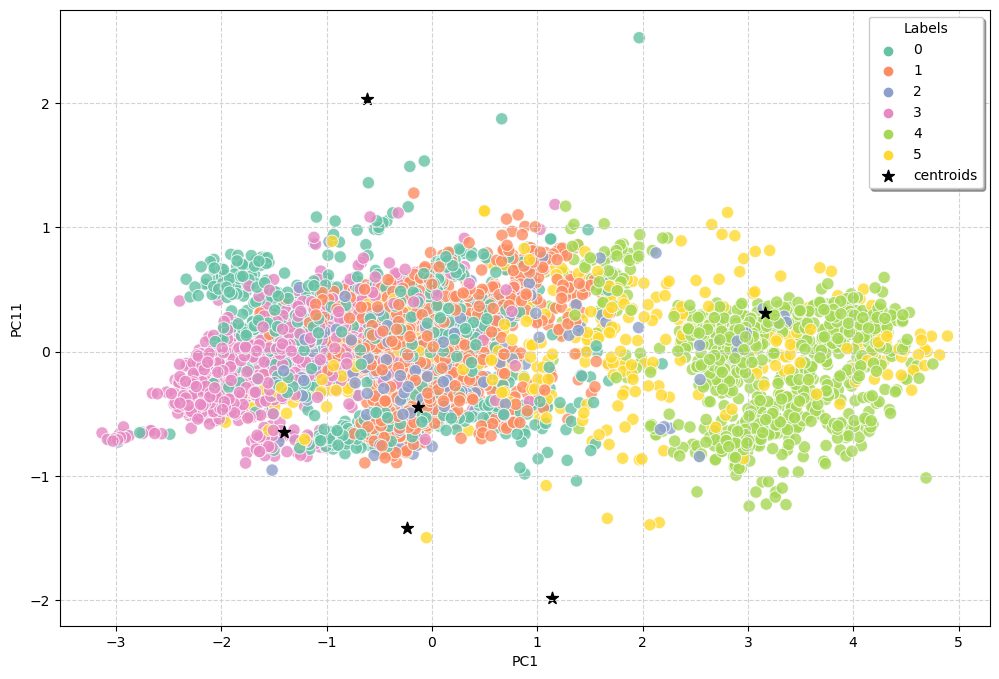

In [43]:
# Visualizing clusters
plt.figure(figsize=(12,8))
sns.scatterplot(data=df2, x='PC1', y='PC11', s=80, hue=kmean.labels_, palette='Set2', zorder=1, alpha=.8)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], 
            marker="*", c="black", s=80, label="centroids")
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.show()